In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

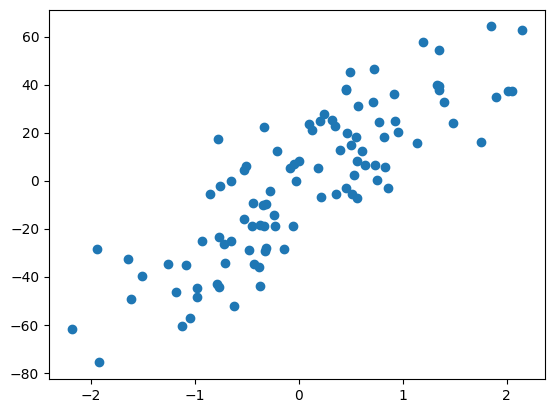

In [66]:
plt.scatter(X,y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))
print(lr.coef_)
print(lr.intercept_)

0.6186926408914155
[28.16404017]
-2.7130725669241036


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+04, tolerance: 7.701e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

alpha=0
R2 Score: 0.7200088567836042
Coefficients: [28.16404017]
Intercept: -2.7130725669241036

alpha=1
R2 Score: 0.7188199553535006
Coefficients: [27.01958454]
Intercept: -2.6851764950016594

alpha=5
R2 Score: 0.6902863210310147
Coefficients: [22.44176201]
Intercept: -2.5735922073118815

alpha=10
R2 Score: 0.6011187137732463
Coefficients: [16.71948386]
Intercept: -2.4341118476996595

alpha=30
R2 Score: 0.0
Coefficients: [0.]
Intercept: -2.026574926744717



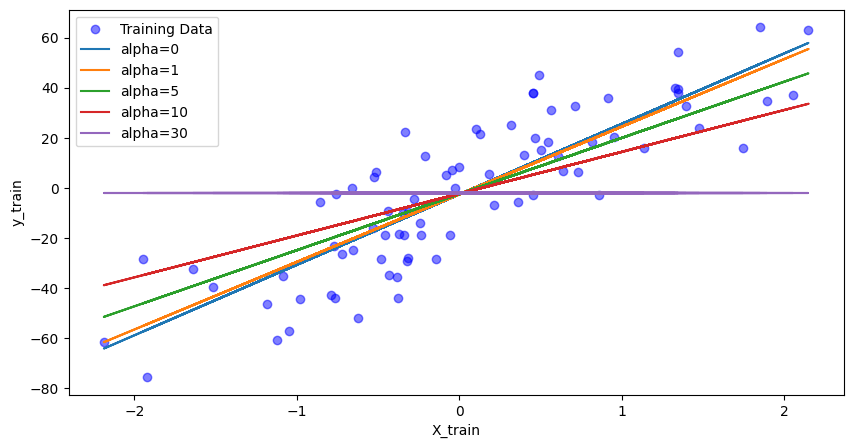

In [70]:
alphas = [0, 1, 5, 10, 30]
plt.figure(figsize=(10, 5))

plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_train = lasso.predict(X_train)

    print('alpha={0}'.format(alpha))
    print("R2 Score:", r2_score(y_train, y_pred_train))
    print("Coefficients:", lasso.coef_)
    print("Intercept:", lasso.intercept_)
    print()

    # Plot regression lines for different alphas
    plt.plot(X_train, y_pred_train, label='alpha={}'.format(alpha))

plt.xlabel("X_train")
plt.ylabel("y_train")
plt.legend()
plt.show()
